In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data1 =pd.read_csv('/kaggle/input/solomon-vrptw-benchmark/solomon_dataset/C1/C101.csv')
data2 =pd.read_csv('/kaggle/input/solomon-vrptw-benchmark/solomon_dataset/R1/R101.csv')
data3 =pd.read_csv('/kaggle/input/solomon-vrptw-benchmark/solomon_dataset/RC1/RC101.csv')

# Clustered

In [3]:
data1.shape # get the dim of the dataset (x,y), there is 101 records and 7 columns(features)

(101, 7)

In [4]:
data1.head() #print out first 5 records of the dataset

,CUST NO.,XCOORD.,YCOORD.,DEMAND,READY TIME,DUE DATE,SERVICE TIME
0,1,40,50,0,0,1236,0
1,2,45,68,10,912,967,90
2,3,45,70,30,825,870,90
3,4,42,66,10,65,146,90
4,5,42,68,10,727,782,90


In [5]:
data1.isnull().sum() #No null values

CUST NO.        0
XCOORD.         0
YCOORD.         0
DEMAND          0
READY TIME      0
DUE DATE        0
SERVICE TIME    0
dtype: int64

In [6]:
data1.duplicated().sum() #No duplicated values

0

In [7]:
# calc the distance from depot (start point) and each customer
from scipy.spatial.distance import cdist

coordinates = data1[['XCOORD.', 'YCOORD.']].values
distance_matrix = cdist(coordinates, coordinates, metric='euclidean')
distance_df = pd.DataFrame(distance_matrix, columns=data1['CUST NO.'], index=data1['CUST NO.'])

In [8]:
from scipy.spatial.distance import euclidean

#depot is CUST NO. 1
depot_coords = data1.iloc[0][['XCOORD.', 'YCOORD.']].values
data1['Distance_to_Depot'] = data1.apply(lambda row: euclidean(depot_coords, [row['XCOORD.'], row['YCOORD.']]), axis=1)

In [9]:
data1.columns = data1.columns.str.replace(' ', '_')

In [10]:
data1.head()

,CUST_NO.,XCOORD.,YCOORD.,DEMAND,READY_TIME,DUE_DATE,SERVICE_TIME,Distance_to_Depot
0,1,40,50,0,0,1236,0,0.000000
1,2,45,68,10,912,967,90,18.681542
2,3,45,70,30,825,870,90,20.615528
3,4,42,66,10,65,146,90,16.124515
4,5,42,68,10,727,782,90,18.110770


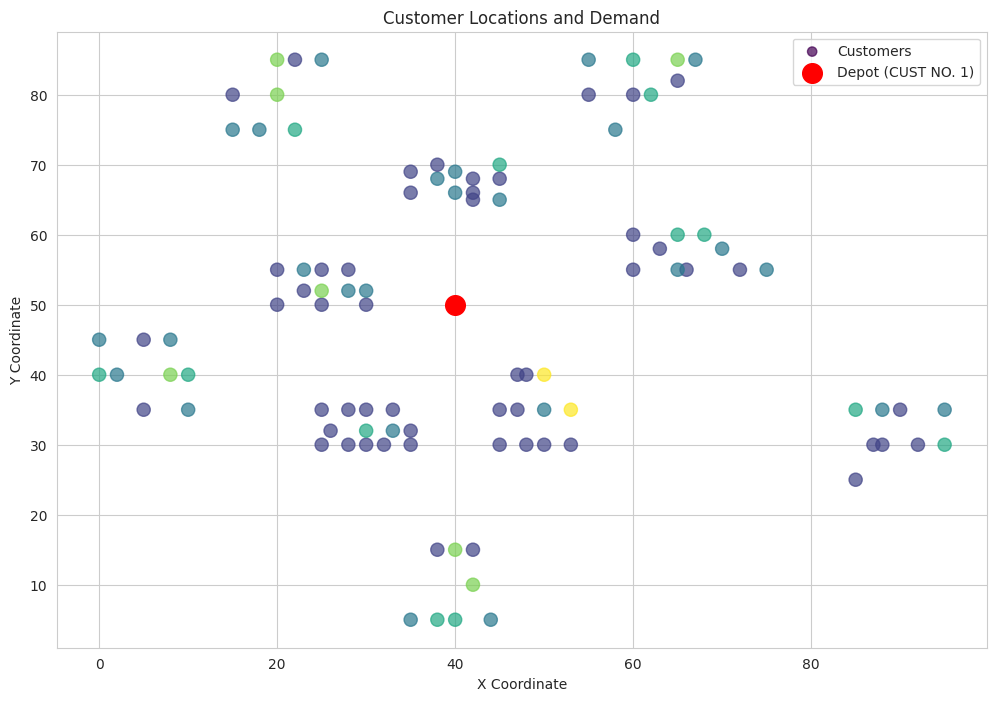

In [11]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(data1['XCOORD.'], data1['YCOORD.'], 
                    c=data1['DEMAND'], s=data1['SERVICE_TIME'], 
                    cmap='viridis', alpha=0.7)

ax.scatter(data1.iloc[0]['XCOORD.'], data1.iloc[0]['YCOORD.'], 
           c='red', s=200, label='Depot (CUST NO. 1)')

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Customer Locations and Demand')
ax.legend(handles=[ax.collections[0], 
                   ax.collections[1]], 
          labels=['Customers', 'Depot (CUST NO. 1)'])

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


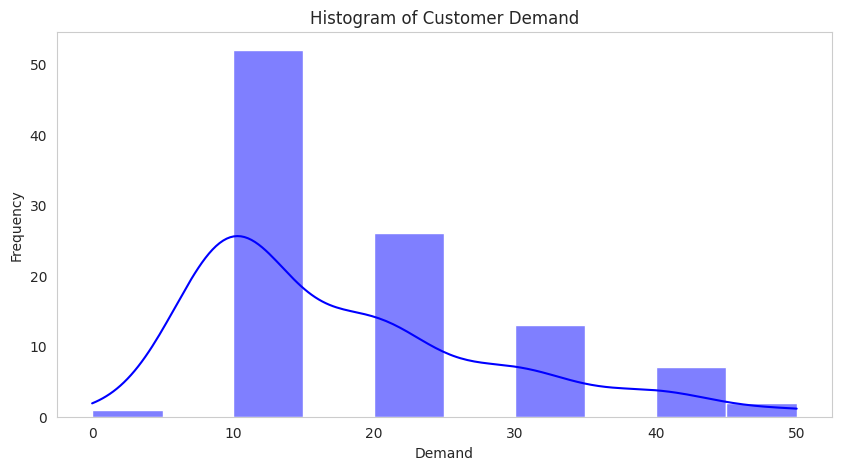

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(data1['DEMAND'], bins=10, kde=True, color='blue')
plt.title('Histogram of Customer Demand')
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.grid()
plt.show()

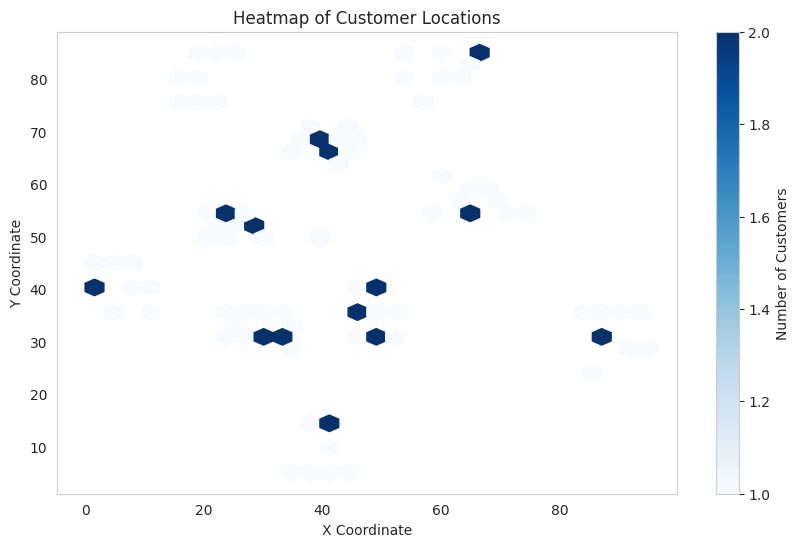

In [13]:
plt.figure(figsize=(10, 6))
plt.hexbin(data1['XCOORD.'], data1['YCOORD.'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Number of Customers')
plt.title('Heatmap of Customer Locations')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid()
plt.show()

# Random

In [14]:
data2.shape

(101, 7)

In [15]:
data2.head()

,CUST NO.,XCOORD.,YCOORD.,DEMAND,READY TIME,DUE DATE,SERVICE TIME
0,1,35,35,0,0,230,0
1,2,41,49,10,161,171,10
2,3,35,17,7,50,60,10
3,4,55,45,13,116,126,10
4,5,55,20,19,149,159,10


In [25]:
print(data2.isnull().sum())
print("---")
print('Duplicated Values:', data2.duplicated().sum())

CUST_NO.             0
XCOORD.              0
YCOORD.              0
DEMAND               0
READY_TIME           0
DUE_DATE             0
SERVICE_TIME         0
Distance_to_Depot    0
dtype: int64
---
Duplicated Values: 0


In [17]:
from scipy.spatial.distance import cdist
from scipy.spatial.distance import euclidean

coordinates = data2[['XCOORD.', 'YCOORD.']].values
distance_matrix = cdist(coordinates, coordinates, metric='euclidean')
distance_df = pd.DataFrame(distance_matrix, columns=data2['CUST NO.'], index=data2['CUST NO.'])

#depot is CUST NO. 1
depot_coords = data2.iloc[0][['XCOORD.', 'YCOORD.']].values
data2['Distance_to_Depot'] = data2.apply(lambda row: euclidean(depot_coords, [row['XCOORD.'], row['YCOORD.']]), axis=1)

In [18]:
data2.columns = data2.columns.str.replace(' ', '_')
data2.head()

,CUST_NO.,XCOORD.,YCOORD.,DEMAND,READY_TIME,DUE_DATE,SERVICE_TIME,Distance_to_Depot
0,1,35,35,0,0,230,0,0.000000
1,2,41,49,10,161,171,10,15.231546
2,3,35,17,7,50,60,10,18.000000
3,4,55,45,13,116,126,10,22.360680
4,5,55,20,19,149,159,10,25.000000


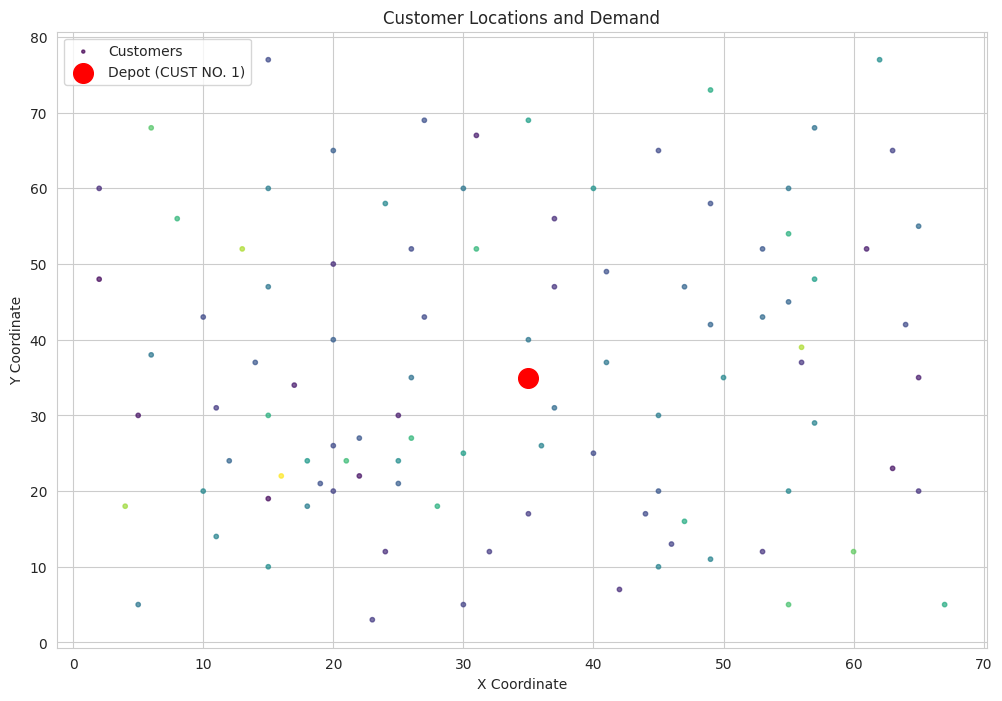

In [19]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(data2['XCOORD.'], data2['YCOORD.'], 
                    c=data2['DEMAND'], s=data2['SERVICE_TIME'], 
                    cmap='viridis', alpha=0.7)

ax.scatter(data2.iloc[0]['XCOORD.'], data2.iloc[0]['YCOORD.'], 
           c='red', s=200, label='Depot (CUST NO. 1)')

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Customer Locations and Demand')
ax.legend(handles=[ax.collections[0], 
                   ax.collections[1]], 
          labels=['Customers', 'Depot (CUST NO. 1)'])

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


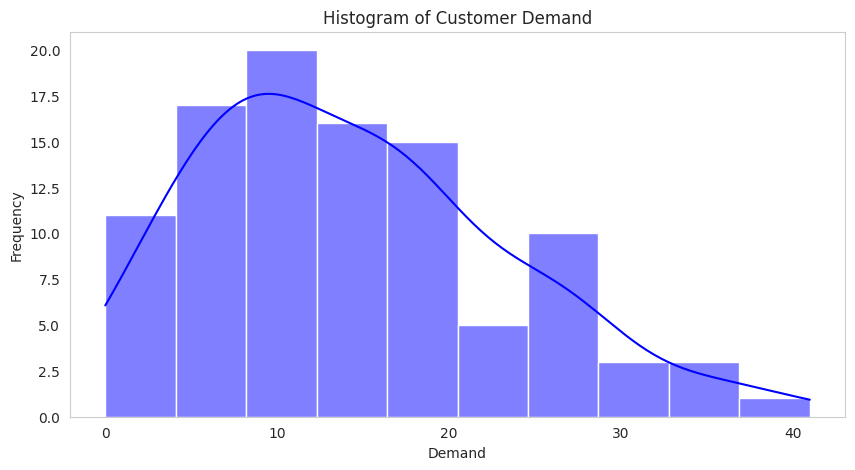

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(data2['DEMAND'], bins=10, kde=True, color='blue')
plt.title('Histogram of Customer Demand')
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.grid()
plt.show()

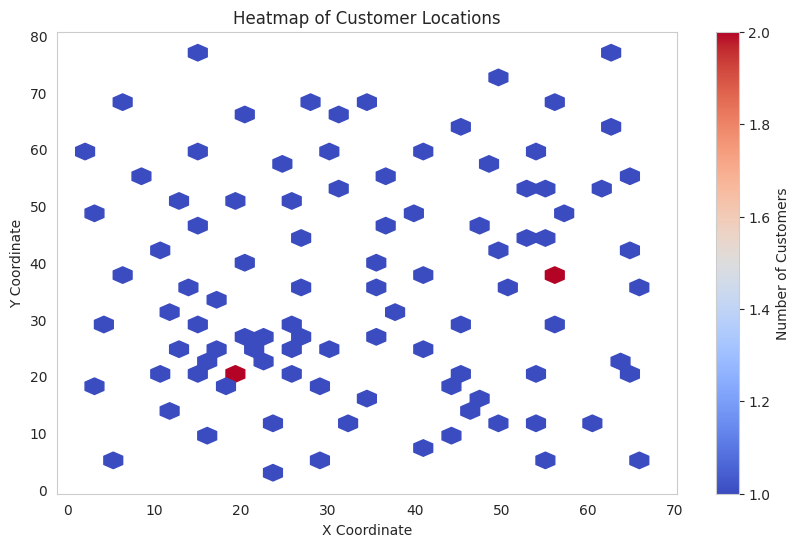

In [22]:
plt.figure(figsize=(10, 6))
plt.hexbin(data2['XCOORD.'], data2['YCOORD.'], gridsize=30, cmap='coolwarm', mincnt=1)
plt.colorbar(label='Number of Customers')
plt.title('Heatmap of Customer Locations')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid()
plt.show()

# Mix of Random and Clustered

In [23]:
data3.shape

(101, 7)

In [24]:
data3.head()

,CUST NO.,XCOORD.,YCOORD.,DEMAND,READY TIME,DUE DATE,SERVICE TIME
0,1,40,50,0,0,240,0
1,2,25,85,20,145,175,10
2,3,22,75,30,50,80,10
3,4,22,85,10,109,139,10
4,5,20,80,40,141,171,10


In [26]:
print(data3.isnull().sum())
print("---")
print('Duplicated Values:', data3.duplicated().sum())

CUST NO.        0
XCOORD.         0
YCOORD.         0
DEMAND          0
READY TIME      0
DUE DATE        0
SERVICE TIME    0
dtype: int64
---
Duplicated Values: 0


In [27]:
from scipy.spatial.distance import cdist
from scipy.spatial.distance import euclidean

coordinates = data3[['XCOORD.', 'YCOORD.']].values
distance_matrix = cdist(coordinates, coordinates, metric='euclidean')
distance_df = pd.DataFrame(distance_matrix, columns=data3['CUST NO.'], index=data3['CUST NO.'])

#depot is CUST NO. 1
depot_coords = data3.iloc[0][['XCOORD.', 'YCOORD.']].values
data3['Distance_to_Depot'] = data3.apply(lambda row: euclidean(depot_coords, [row['XCOORD.'], row['YCOORD.']]), axis=1)

In [28]:
data3.columns = data3.columns.str.replace(' ', '_')
data3.head()

,CUST_NO.,XCOORD.,YCOORD.,DEMAND,READY_TIME,DUE_DATE,SERVICE_TIME,Distance_to_Depot
0,1,40,50,0,0,240,0,0.000000
1,2,25,85,20,145,175,10,38.078866
2,3,22,75,30,50,80,10,30.805844
3,4,22,85,10,109,139,10,39.357337
4,5,20,80,40,141,171,10,36.055513


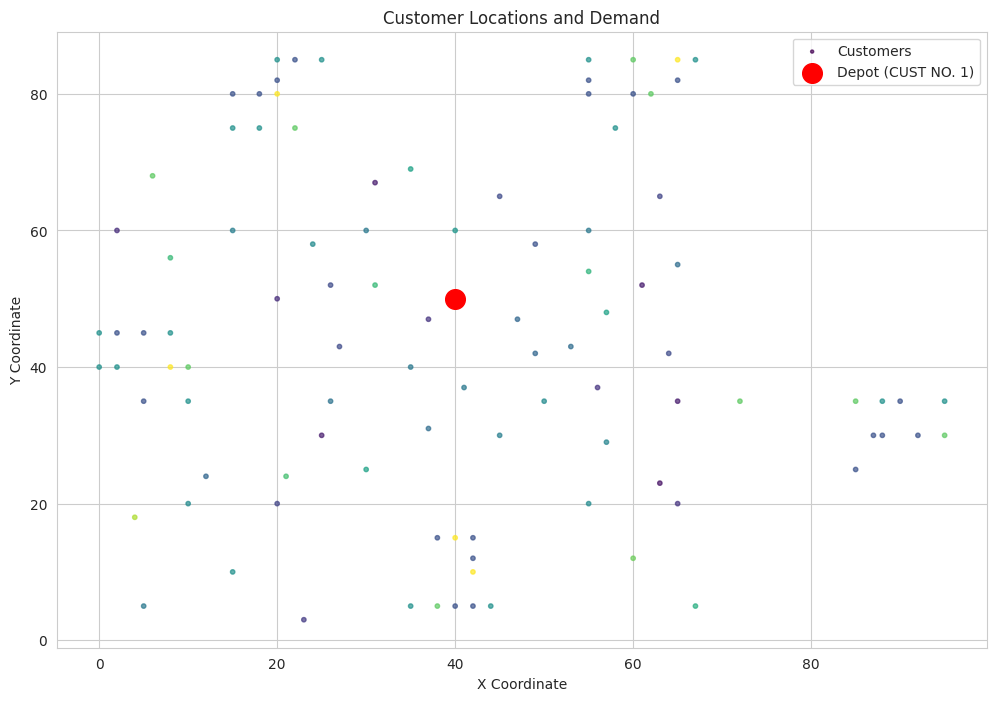

In [29]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(data3['XCOORD.'], data3['YCOORD.'], 
                    c=data3['DEMAND'], s=data3['SERVICE_TIME'], 
                    cmap='viridis', alpha=0.7)

ax.scatter(data3.iloc[0]['XCOORD.'], data3.iloc[0]['YCOORD.'], 
           c='red', s=200, label='Depot (CUST NO. 1)')

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Customer Locations and Demand')
ax.legend(handles=[ax.collections[0], 
                   ax.collections[1]], 
          labels=['Customers', 'Depot (CUST NO. 1)'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


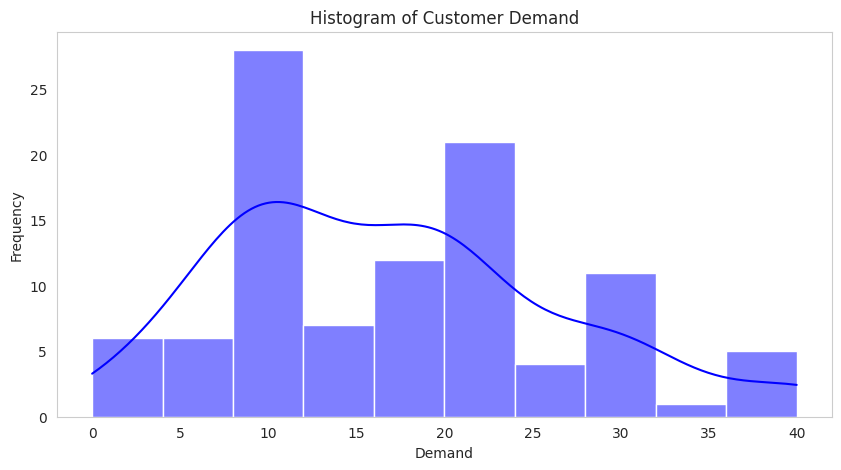

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(data3['DEMAND'], bins=10, kde=True, color='blue')
plt.title('Histogram of Customer Demand')
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.grid()
plt.show()

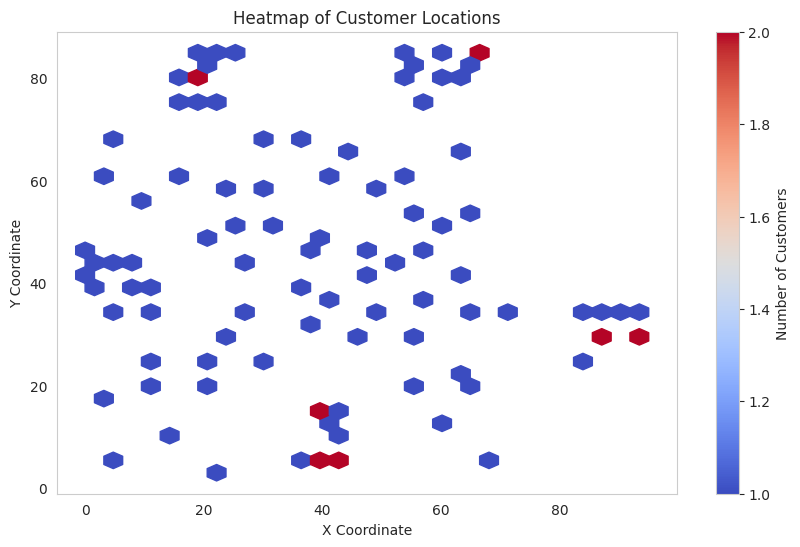

In [31]:
plt.figure(figsize=(10, 6))
plt.hexbin(data3['XCOORD.'], data3['YCOORD.'], gridsize=30, cmap='coolwarm', mincnt=1)
plt.colorbar(label='Number of Customers')
plt.title('Heatmap of Customer Locations')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid()
plt.show()